In [1]:
from weightwatcher import WeightWatcher

import matplotlib.pyplot as plt
from matplotlib import cm

import plot_utils

In [11]:
from transformers import LlamaForCausalLM

model = LlamaForCausalLM.from_pretrained("camelids/llama-13b-fp16-safetensors")

Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████████████████████████████████| 14/14 [05:52<00:00, 25.16s/it]


In [12]:
watcher = WeightWatcher(model=model) 
details = watcher.describe()
layer_ids = details[details.layer_type=='LAYER_TYPE.DENSE'].layer_id.to_numpy()
layer_ids = details.layer_id.to_numpy()

layer_names = [str(x) for x in layer_ids]
results =  watcher.analyze(layers=layer_ids, detX=True, svd_method="accurate")

In [13]:
results.to_pickle("llama-13b-details")

In [2]:
import pickle
with open("llama-13b-details", "rb") as fp:
  df13 = pickle.load(fp)

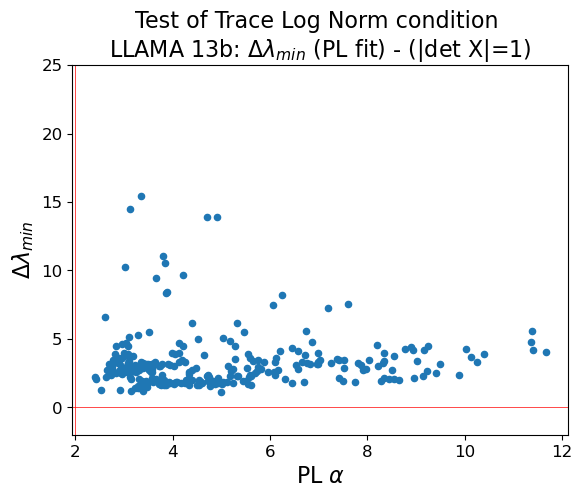

In [3]:
df13.plot.scatter(x='alpha', y='detX_delta')
plt.title("Test of Trace Log Norm condition \n"+r"LLAMA 13b: $\Delta\lambda_{min}$ (PL fit) - (|det X|=1)", fontdict={'fontsize': plot_utils.MEDIUM_SIZE})
plt.ylim((-2, 25))
plt.xlabel(r"PL $\alpha$")
plt.ylabel(r"$\Delta\lambda_{min}$")
plt.axvline(2, linewidth=0.5, color="red", zorder=-1)
plt.axhline(0, linewidth=0.5, color="red", zorder=-1)
plt.savefig("LLAMA_13b_ESD_trends.png")


In [2]:
from safetensors import safe_open
import pandas as pd

df = None

for i in range(1, 15):
  filename = f"./llama-65b_safetensors/model-{i:05}-of-00014.safetensors"
  state_dict = {}
  with safe_open(filename, framework="pt", device='cpu') as f:
    for k in f.keys():
      state_dict[k] = f.get_tensor(k)
      # print(k)
  
  
  watcher = WeightWatcher(model={"state_dict": state_dict})
  details = watcher.analyze(detX = True)
  
  if df is None: df = details
  else:          df = pd.concat([df, details])

    layer_id                             name         D     M      N        Q  \
0          1               model.embed_tokens  0.036168  8192  32000  3.90625   
1          3     model.layers.0.mlp.down_proj  0.020997  8192  22016  2.68750   
2          4     model.layers.0.mlp.gate_proj  0.020570  8192  22016  2.68750   
3          5       model.layers.0.mlp.up_proj  0.028090  8192  22016  2.68750   
4          7  model.layers.0.self_attn.k_proj  0.015414  8192   8192  1.00000   
5          8  model.layers.0.self_attn.o_proj  0.017599  8192   8192  1.00000   
6          9  model.layers.0.self_attn.q_proj  0.020537  8192   8192  1.00000   
7         10  model.layers.0.self_attn.v_proj  0.035410  8192   8192  1.00000   
8         12     model.layers.1.mlp.down_proj  0.008229  8192  22016  2.68750   
9         13     model.layers.1.mlp.gate_proj  0.019634  8192  22016  2.68750   
10        14       model.layers.1.mlp.up_proj  0.086498  8192  22016  2.68750   
11        16  model.layers.1

In [6]:
df.to_pickle("llama-65b-details")

In [4]:
import pickle
with open("llama-65b-details", "rb") as fp:
  df65 = pickle.load(fp)

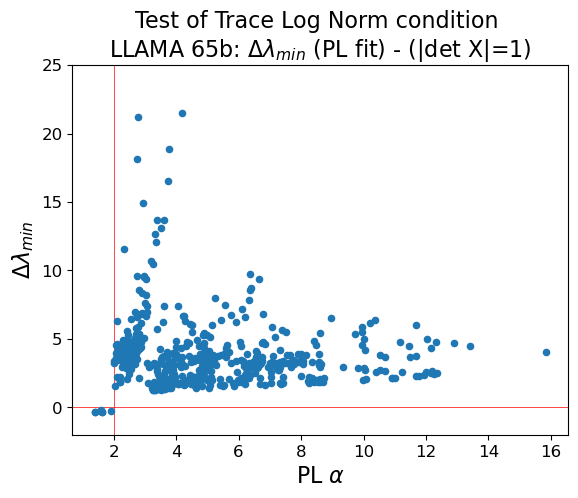

In [5]:
df65.plot.scatter(x='alpha', y='detX_delta')
plt.title("Test of Trace Log Norm condition \n"+r"LLAMA 65b: $\Delta\lambda_{min}$ (PL fit) - (|det X|=1)", fontdict={'fontsize': plot_utils.MEDIUM_SIZE})
plt.ylim((-2, 25))
plt.xlabel(r"PL $\alpha$")
plt.ylabel(r"$\Delta\lambda_{min}$")
plt.axvline(2, linewidth=0.5, color="red", zorder=-1)
plt.axhline(0, linewidth=0.5, color="red", zorder=-1)
plt.savefig("LLAMA_65b_ESD_trends.png")
